In [1]:
# Importing all Libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Importing Data Set

In [2]:
data=pd.read_csv(r"C:\Users\omkar\OneDrive\Desktop\DJS_COMPUTE\data2_copy.csv")
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data['native.country'].value_counts()

native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

# Missing Values 

In [5]:
mode_workclass=data['workclass'].mode()
mode_workclass

0    Private
Name: workclass, dtype: object

In [6]:
x=data.workclass
x.replace('?','Private',inplace=True)
x

0        Private
1        Private
2        Private
3        Private
4        Private
          ...   
32556    Private
32557    Private
32558    Private
32559    Private
32560    Private
Name: workclass, Length: 32561, dtype: object

In [7]:
mode_occupation=data['occupation'].mode()
mode_occupation

0    Prof-specialty
Name: occupation, dtype: object

In [8]:
y=data.occupation
y.replace('?','Prof-specialty',inplace=True)

In [9]:
mode_country=data['native.country'].mode()
mode_country

0    United-States
Name: native.country, dtype: object

In [10]:
z=data['native.country']
z.replace('?','United-States',inplace=True)

In [11]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


C:\Users\omkar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


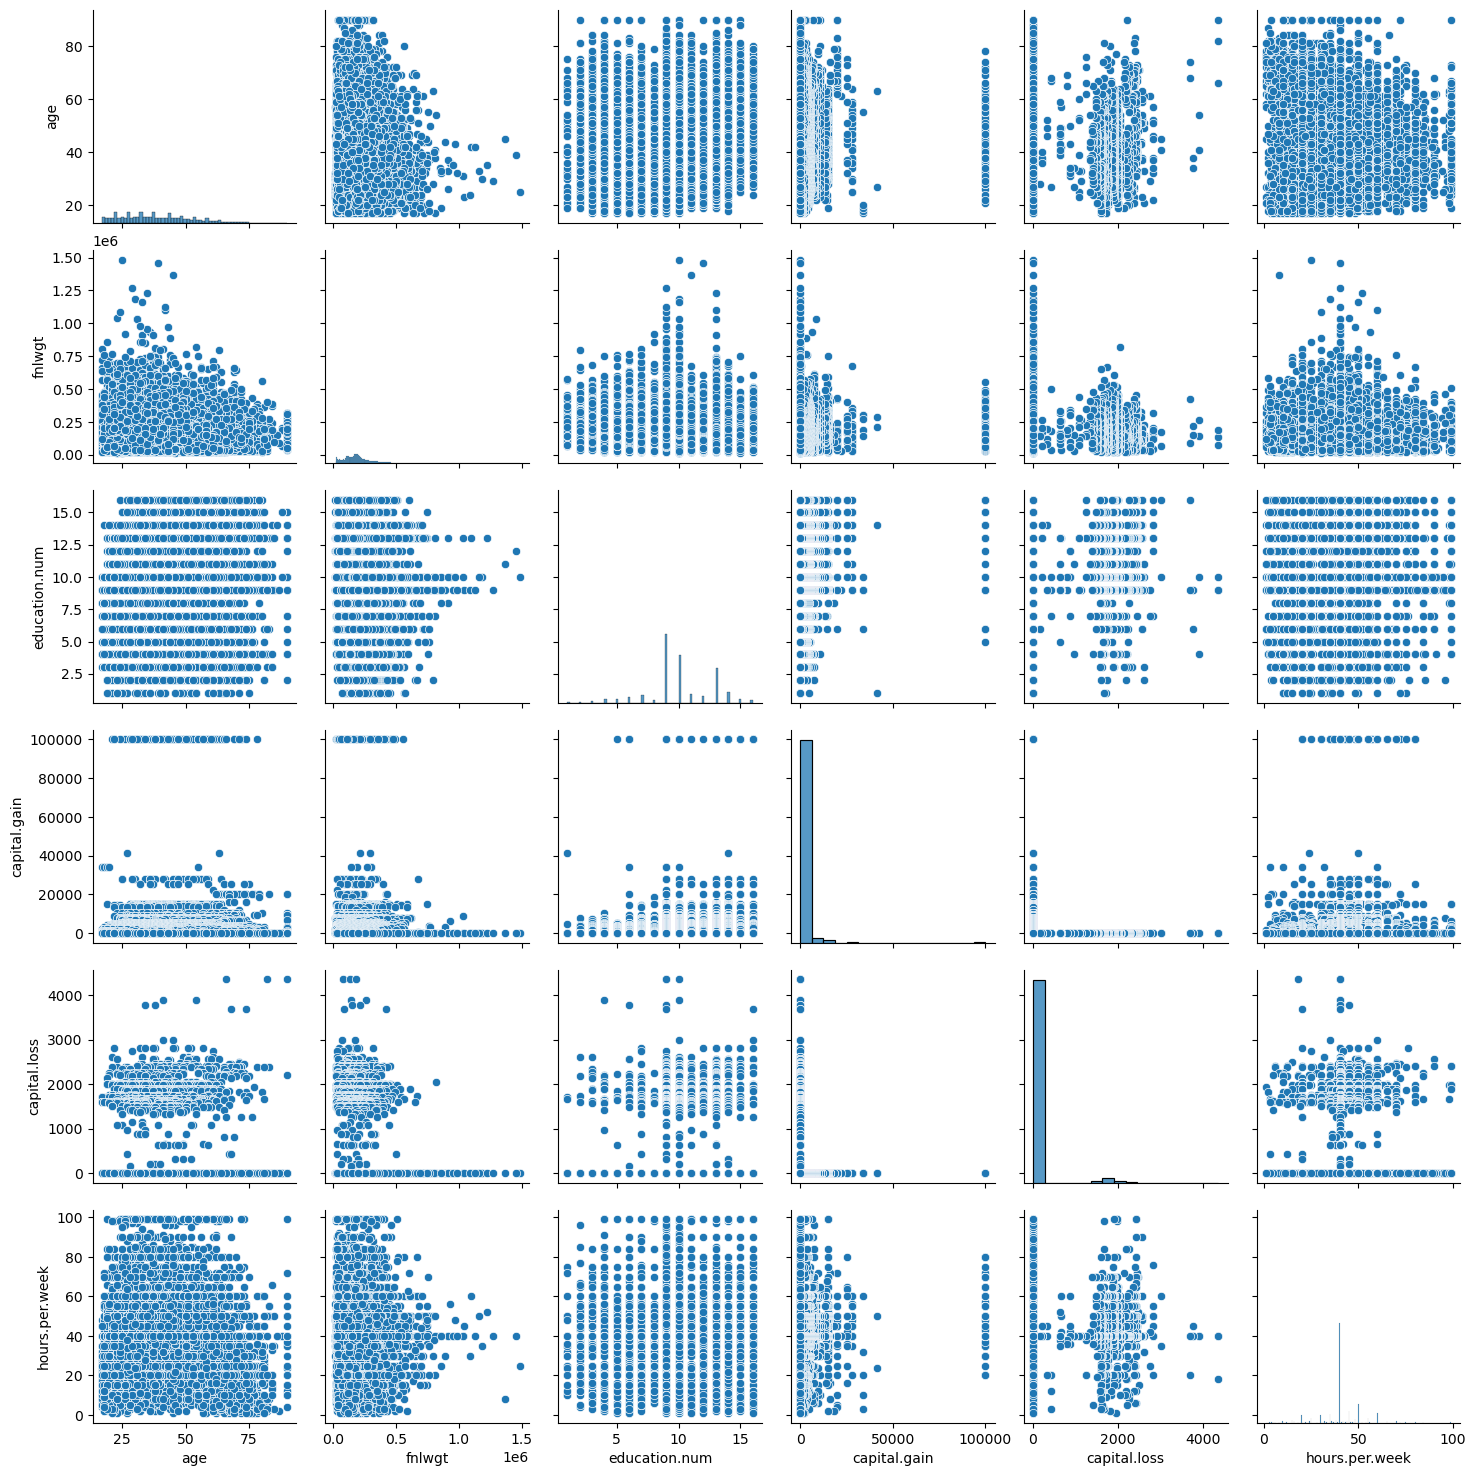

In [12]:
sns.pairplot(data)

# Splitting of Data Set 

In [13]:
X=data.drop(['age','marital.status','relationship','race','sex','income'],axis='columns')
X

,workclass,fnlwgt,education,education.num,occupation,capital.gain,capital.loss,hours.per.week,native.country
0,Private,77053,HS-grad,9,Prof-specialty,0,4356,40,United-States
1,Private,132870,HS-grad,9,Exec-managerial,0,4356,18,United-States
2,Private,186061,Some-college,10,Prof-specialty,0,4356,40,United-States
3,Private,140359,7th-8th,4,Machine-op-inspct,0,3900,40,United-States
4,Private,264663,Some-college,10,Prof-specialty,0,3900,40,United-States
...,...,...,...,...,...,...,...,...,...
32556,Private,310152,Some-college,10,Protective-serv,0,0,40,United-States
32557,Private,257302,Assoc-acdm,12,Tech-support,0,0,38,United-States
32558,Private,154374,HS-grad,9,Machine-op-inspct,0,0,40,United-States
32559,Private,151910,HS-grad,9,Adm-clerical,0,0,40,United-States


In [14]:
Y=data.income
Y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

<Axes: xlabel='income', ylabel='count'>

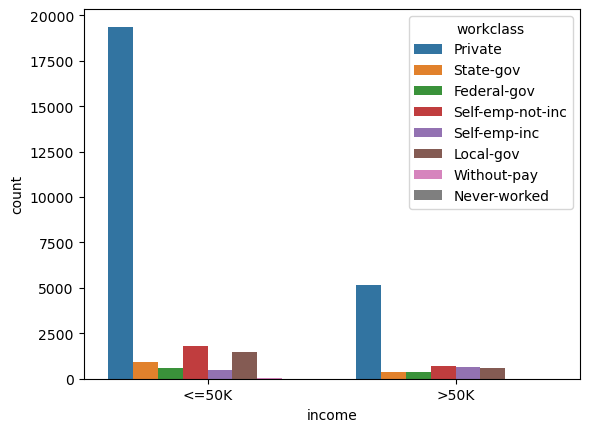

In [15]:
sns.countplot(x='income',hue='workclass',data=data)

<Axes: xlabel='income', ylabel='count'>

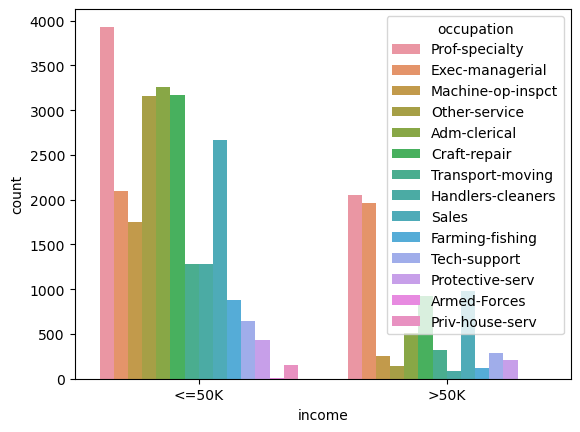

In [16]:
sns.countplot(x='income',hue='occupation',data=data)

<Axes: xlabel='income', ylabel='hours.per.week'>

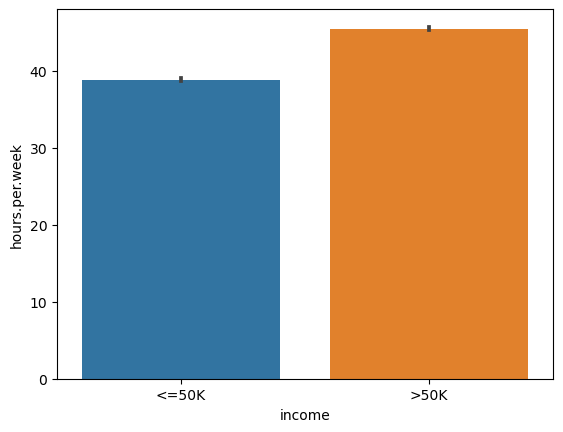

In [17]:
sns.barplot(x='income',y='hours.per.week',data=data)

<Axes: xlabel='income', ylabel='count'>

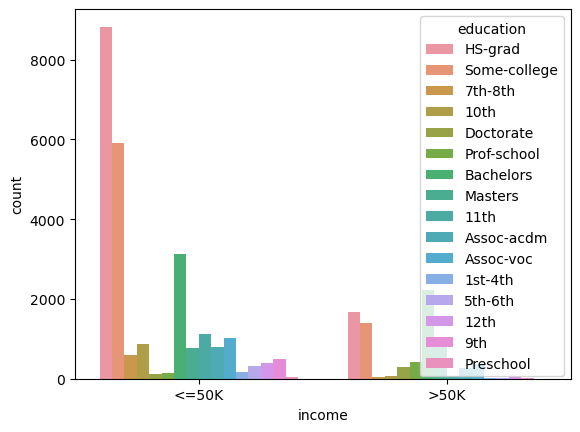

In [18]:
sns.countplot(x='income',hue='education',data=data)

In [19]:
A=X.workclass
A=pd.get_dummies(A,drop_first=True,dtype=int)
print(A)
B=X.occupation
B=pd.get_dummies(B,drop_first=True,dtype=int)
print(B)
C=X.education
C=pd.get_dummies(C,drop_first=True,dtype=int)
print(C)
D=X['native.country']
D=pd.get_dummies(D,drop_first=True,dtype=int)
print(D)

       Local-gov  Never-worked  Private  Self-emp-inc  Self-emp-not-inc  \
0              0             0        1             0                 0   
1              0             0        1             0                 0   
2              0             0        1             0                 0   
3              0             0        1             0                 0   
4              0             0        1             0                 0   
...          ...           ...      ...           ...               ...   
32556          0             0        1             0                 0   
32557          0             0        1             0                 0   
32558          0             0        1             0                 0   
32559          0             0        1             0                 0   
32560          0             0        1             0                 0   

       State-gov  Without-pay  
0              0            0  
1              0            0  
2  

In [20]:
X=pd.concat([X,A,B,C,D],axis='columns')
X.head(30)
X=X.drop(['workclass','occupation','education.num','education','native.country'],axis='columns')
X

,fnlwgt,capital.gain,capital.loss,hours.per.week,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,77053,0,4356,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,132870,0,4356,18,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,186061,0,4356,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,140359,0,3900,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,264663,0,3900,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,310152,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,257302,0,0,38,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,154374,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,151910,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
Y=pd.get_dummies(Y,drop_first=True)
Y

,>50K
0,False
1,False
2,False
3,False
4,False
...,...
32556,False
32557,False
32558,True
32559,False


# Training and Testing of Data Set

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

       fnlwgt  capital.gain  capital.loss  hours.per.week  Local-gov  \
29313  104334             0             0              50          0   
16021  203055             0             0              40          0   
905    138626             0          1876              50          0   
31251  120131             0             0              40          0   
3368    32950          4101             0              40          0   
...       ...           ...           ...             ...        ...   
12119   39493             0             0              20          0   
24423  190728             0             0              40          0   
14147  403489             0             0              45          0   
23320  106951             0             0              42          0   
5640   405723             0             0              40          0   

       Never-worked  Private  Self-emp-inc  Self-emp-not-inc  State-gov  ...  \
29313             0        1             0             

# Model Building

In [23]:
log_reg=LogisticRegression()

In [24]:
log_reg.fit(X_train,Y_train)

C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
Y_test_predicted=log_reg.predict(X_test)
Y_test_predicted

array([False, False, False, ...,  True,  True, False])

In [26]:
confusion_matrix=pd.DataFrame(confusion_matrix(Y_test,Y_test_predicted))
confusion_matrix

,0,1
0,6961,480
1,1474,854


In [27]:
# Accuracy
print(accuracy_score(Y_test,Y_test_predicted))

0.7999795270754427


In [28]:
# Precision
print(precision_score(Y_test,Y_test_predicted))

0.6401799100449775


In [29]:
# Recall
print(recall_score(Y_test,Y_test_predicted))

0.36683848797250856


In [30]:
# F1_score
print(f1_score(Y_test,Y_test_predicted))

0.4664117968323321
